In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.interpolation import shift
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



mnist = fetch_openml('mnist_784', version=1)
df = pd.DataFrame(mnist.data)
df['target'] = mnist.target.astype(int)

X, y = mnist["data"], mnist["target"].astype(int)
test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in test_split.split(df, df["target"]):
    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

# print(y_train.value_counts().sort_index() / len(X_train))
# print(y_test.value_counts().sort_index() / len(X_test))

C:\Users\Windows\AppData\Local\Temp\ipykernel_11292\1428029080.py:7: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [2]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.astype(np.float32))
X_test = scaler.transform(X_test.astype(np.float32))

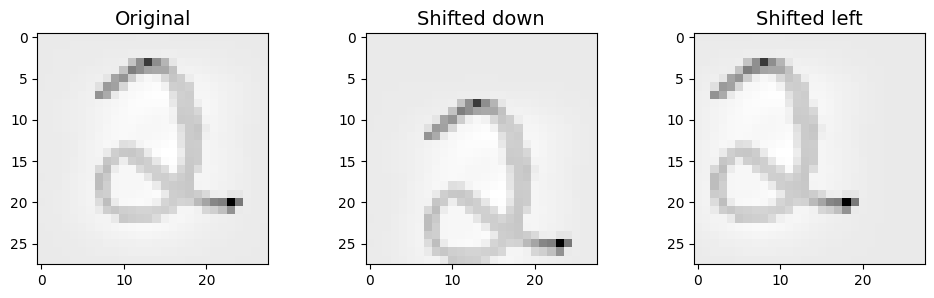

In [3]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [4]:
print(X_train.shape)

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print(X_train_augmented.shape)

(56000, 784)
(280000, 784)


In [5]:
# # Test F1: 0.9075714111060671
# sgd_clf = SGDClassifier(random_state=42)

# # param_grid = {
# #     'loss': ['hinge', 'log_loss', 'modified_huber'],
# #     'alpha': [0.0001, 0.001, 0.01],
# #     'penalty': ['l2', 'l1', 'elasticnet']
# # }

# param_grid = {
#     'loss': ['modified_huber'],
#     'alpha': [0.001],
#     'penalty': ['elasticnet']
# }

# grid_search = GridSearchCV(sgd_clf, param_grid, scoring='f1_weighted', cv=3, verbose=3, n_jobs=-1, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [6]:
# # Test F1: 0.9081725956963117
# sgd_clf = SGDClassifier(loss='modified_huber', alpha=0.001, penalty='elasticnet', random_state=42)
# sgd_clf.fit(X_train_augmented, y_train_augmented)

# y_pred = sgd_clf.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [7]:
# # Test F1: 0.9193990824119003
# log_reg = LogisticRegression(random_state=42)

# param_grid = {
#     'tol': [1e-4, 1e-3, 1e-2],
#     'C': [0.1, 1.0, 10.0],
#     'penalty': ['l2']
# }

# # param_grid = {
# #     'loss': ['modified_huber'],
# #     'alpha': [0.001],
# #     'penalty': ['elasticnet']
# # }

# grid_search = GridSearchCV(log_reg, param_grid, scoring='f1_weighted', cv=3, verbose=3, n_jobs=-1, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [8]:
# # Test F1: 0.9203339405640859
# log_reg = LogisticRegression(C=0.1, penalty='l2', tol=0.001, random_state=42)
# log_reg.fit(X_train_augmented, y_train_augmented)

# y_pred = log_reg.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ...metric=manhattan, n_neighbors=3;, score=0.954 total time= 1.6min
[CV 2/3] END ...metric=manhattan, n_neighbors=3;, score=0.956 total time= 1.5min
[CV 3/3] END ...metric=manhattan, n_neighbors=3;, score=0.956 total time= 1.5min
{'metric': 'manhattan', 'n_neighbors': 3}
KNeighborsClassifier(metric='manhattan', n_neighbors=3)
0.9557556562023207 {'metric': 'manhattan', 'n_neighbors': 3}
Test Precision: 0.9602037445389215
Test Recall: 0.9597142857142857
Test F1: 0.9596088129203187
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1381
           1       0.94      0.99      0.96      1575
           2       0.98      0.95      0.96      1398
           3       0.95      0.96      0.96      1428
           4       0.96      0.95      0.96      1365
           5       0.96      0.95      0.95      1263
           6       0.97      0.98      0.98      1375
           

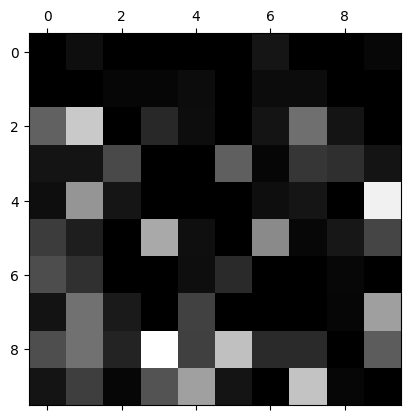

In [ ]:
# # Test F1: 0.9596088129203187
# knn = KNeighborsClassifier()

# # param_grid = {
# #     'n_neighbors': [3, 5, 7, 9, 11],
# #     'metric': ['euclidean', 'manhattan']
# # }

# param_grid = {
#     'n_neighbors': [3],
#     'metric': ['manhattan']
# }

# grid_search = GridSearchCV(knn, param_grid, scoring='f1_weighted', cv=3, verbose=3, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

Test Precision: 0.963770770316196
Test Recall: 0.9633571428571429
Test F1: 0.9632682153813272
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1381
           1       0.94      1.00      0.97      1575
           2       0.98      0.95      0.97      1398
           3       0.95      0.97      0.96      1428
           4       0.97      0.96      0.96      1365
           5       0.96      0.95      0.96      1263
           6       0.98      0.98      0.98      1375
           7       0.96      0.96      0.96      1459
           8       0.99      0.91      0.95      1365
           9       0.95      0.95      0.95      1391

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

[[1375    2    0    0    0    0    3    0    0    1]
 [   0 1569    1    0    2    0    1    2    0    0]
 [  11   24 1332    5    2    0    3   17

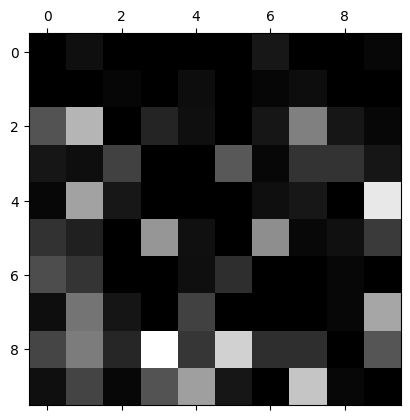

In [ ]:
# # Test F1: 0.9632682153813272 
# knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
# knn.fit(X_train_augmented, y_train_augmented)

# y_pred = knn.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ..............C=0.1, kernel=linear;, score=0.930 total time= 2.3min
[CV 2/3] END ..............C=0.1, kernel=linear;, score=0.927 total time= 2.2min
[CV 3/3] END ..............C=0.1, kernel=linear;, score=0.930 total time= 2.1min
[CV 1/3] END .................C=0.1, kernel=rbf;, score=0.923 total time= 7.6min
[CV 2/3] END .................C=0.1, kernel=rbf;, score=0.924 total time= 7.7min
[CV 3/3] END .................C=0.1, kernel=rbf;, score=0.925 total time= 7.7min
[CV 1/3] END ................C=0.1, kernel=poly;, score=0.825 total time=15.6min
[CV 2/3] END ................C=0.1, kernel=poly;, score=0.831 total time=15.7min
[CV 3/3] END ................C=0.1, kernel=poly;, score=0.834 total time=15.4min
[CV 1/3] END ................C=1, kernel=linear;, score=0.918 total time= 2.5min
[CV 2/3] END ................C=1, kernel=linear;, score=0.919 total time= 2.5min
[CV 3/3] END ................C=1, kernel=linear;,

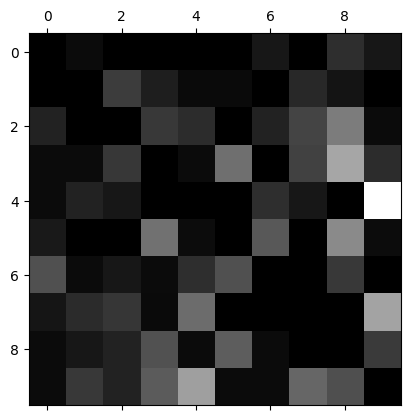

In [11]:
# Test F1: 
svm = SVC()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]
}

# param_grid = {
#     'n_neighbors': [3],
#     'metric': ['manhattan']
# }

grid_search = GridSearchCV(svm, param_grid, scoring='f1_weighted', cv=3, verbose=3, error_score='raise')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

y_pred = grid_search.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1: {f1}")
print(classification_rep)

conf_mx = confusion_matrix(y_test, y_pred)
print(conf_mx)

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()